# Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [x] Choose your target. Which column in your tabular dataset will you predict?

We'll be predicting the posted sale price of cars posted on Craigslist.

- [x] Is your problem regression or classification?

Our problem is regression.

- [x] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
    
    Our target is right-skewed.  We can try log transforming later on when we're tuning our model.
    
- [x] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
    
    All 3, mostly R^2.
    
- [x] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    
    Yes, we're excluding the cheapest and most expensive vehicles to create reasonable range of values.
    
    - Will you do a random split or a time-based split?
    
    We'll do a random split, I don't have datetime data for the postings.
    
- [x] Begin to clean and explore your data.
- [x] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

I've already excluded a few features.  I think I'll keep the rest for now and see how my model performs.

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
# imports

import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install plotly
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

%matplotlib inline

  Using cached pandas-1.1.0-cp38-cp38-win_amd64.whl (9.6 MB)
  Using cached numpy-1.19.1-cp38-cp38-win_amd64.whl (13.0 MB)
  Using cached pytz-2020.1-py2.py3-none-any.whl (510 kB)
  Using cached matplotlib-3.3.1-cp38-cp38-win_amd64.whl (8.5 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached Pillow-7.2.0-cp38-cp38-win_amd64.whl (2.1 MB)
  Using cached kiwisolver-1.2.0-cp38-none-win_amd64.whl (58 kB)
  Using cached plotly-4.9.0-py2.py3-none-any.whl (12.9 MB)
Processing c:\users\max\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56\retrying-1.3.3-py3-none-any.whl


In [19]:
# original dataframe

basedf = pd.read_csv('data/vehicles.csv')

In [20]:
# copy dataframe for personal use

df = basedf

In [323]:
df.shape

(435849, 25)

In [360]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7119256118,https://mohave.craigslist.org/ctd/d/lake-havas...,mohave county,https://mohave.craigslist.org,3495,2012.0,jeep,patriot,like new,4 cylinders,...,NaN,NaN,NaN,silver,https://images.craigslist.org/00B0B_k2AXIJ21ok...,"THIS 2012 JEEP PATRIOT IS A 4CYL. AC, STEREO, ...",NaN,az,34.4554,-114.2690
1,7120880186,https://oregoncoast.craigslist.org/cto/d/warre...,oregon coast,https://oregoncoast.craigslist.org,13750,2014.0,bmw,328i m-sport,good,NaN,...,rwd,NaN,sedan,grey,https://images.craigslist.org/00U0U_3cLk0WGOJ8...,Selling my 2014 BMW 328i with the following be...,NaN,or,46.1837,-123.8240
2,7115048251,https://greenville.craigslist.org/cto/d/sparta...,greenville / upstate,https://greenville.craigslist.org,2300,2001.0,dodge,caravan,excellent,6 cylinders,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_t4WqYn5nDC...,"01 DODGE CARAVAN,3.3 ENGINE,AUT TRANS,199000 M...",NaN,sc,34.9352,-81.9654
3,7119250502,https://mohave.craigslist.org/cto/d/lake-havas...,mohave county,https://mohave.craigslist.org,9000,2004.0,chevrolet,colorado ls,excellent,5 cylinders,...,rwd,mid-size,pickup,red,https://images.craigslist.org/00J0J_lJEzfeVLHI...,"2004 Chevy Colorado LS, ONLY 54000 ORIGINAL MI...",NaN,az,34.4783,-114.2710
4,7120433904,https://maine.craigslist.org/ctd/d/searsport-t...,maine,https://maine.craigslist.org,0,2021.0,NaN,Honda-Nissan-Kia-Ford-Hyundai-VW,NaN,NaN,...,NaN,NaN,NaN,NaN,https://images.craigslist.org/01010_j0IW34mCsm...,CALL: 207.548.6500 TEXT: 207.407.5598 **WE FI...,NaN,me,44.4699,-68.8963


In [361]:
df.isnull().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1117
manufacturer     20747
model             6199
condition       186806
cylinders       166384
fuel              2991
odometer         75148
title_status      1806
transmission      2146
vin             196652
drive           122011
size            295961
type            117108
paint_color     135247
image_url           24
description         27
county          435849
state                0
lat               8235
long              8235
dtype: int64

In [362]:
# Here's our target
# My problem is a regression

df['price'].value_counts()

0        30701
6995      3964
7995      3877
4500      3822
5995      3748
         ...  
42898        1
28555        1
26506        1
32649        1
23924        1
Name: price, Length: 16742, dtype: int64

In [355]:
# Dropping county because it has no filled values, other columns aren't relevant
# Replacing price values of 0 with NaN - we don't want to keep these observations
# We then drop those rows

df = df.drop(['county', 'url', 'region_url', 'image_url', 'description'], axis=1)
df['price'] = df['price'].replace(0, np.nan)
df = df.dropna(axis=0, subset=['price'])

In [344]:
# Removing ridiculous outliers (outrageously high prices and low prices to bait responses)

df = df[(df['price'] >= np.percentile(df['price'], 1)) & 
        (df['price'] <= np.percentile(df['price'], 99.9))]

In [302]:
df.shape

(401108, 20)

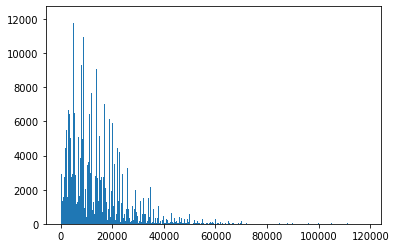

In [345]:
plt.hist(df['price'], bins=500);

In [296]:
df['price']

0          3495.0
1         13750.0
2          2300.0
3          9000.0
5           500.0
           ...   
435844     2500.0
435845     2700.0
435846     2450.0
435847     8995.0
435848     6577.0
Name: price, Length: 401108, dtype: float64

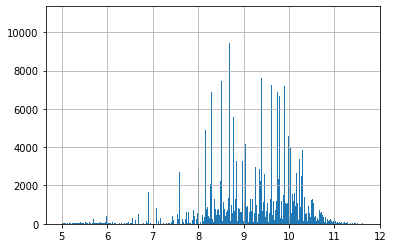

In [346]:
# How our target vector looks once normalized with a log transform

df["price"].apply(np.log).hist(bins=500);

In [349]:
# How we'll apply log transform

# df['price'] = df["price"].apply(np.log)

In [350]:
df['price'].head()

0    8.159089
1    9.528794
2    7.740664
3    9.104980
5    6.214608
Name: price, dtype: float64

In [ ]:
# We'll be using R^2 to as our main regression metric, we can print the others out too though